## Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


## Import Dataset

In [2]:
train = pd.read_csv('mnist/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape

(42000, 785)

In [4]:
target = train['label']
train = train.drop('label', axis=1)

## Calculating Eigenvectors

In [5]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

X = train.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [
    (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))
]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [
    (i/tot)*100 for i in sorted(eig_vals, reverse=True)
] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

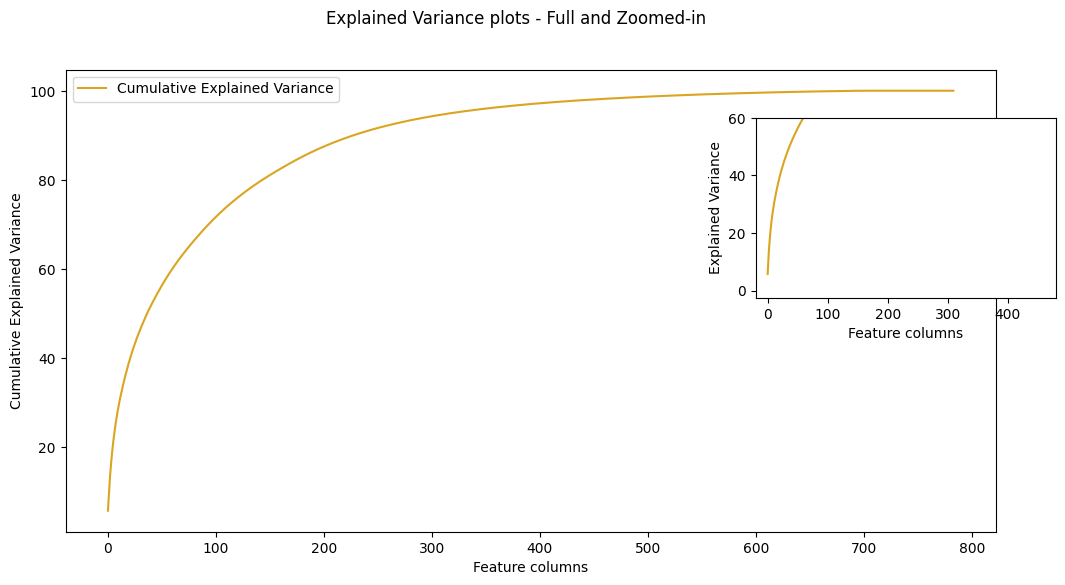

In [6]:
# Create a DataFrame from the data
df = pd.DataFrame({'Feature columns': range(784),
                   'Cumulative Explained Variance': cum_var_exp})

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df, 
    x='Feature columns', 
    y='Cumulative Explained Variance', 
    color='goldenrod', 
    label='Cumulative Explained Variance'
)

# Zoomed-in plot
plt.axes([0.7, 0.5, 0.25, 0.3])
sns.lineplot(
    data=df, 
    x='Feature columns', 
    y='Cumulative Explained Variance', 
    color='goldenrod'
)

# Set titles and labels
plt.suptitle('Explained Variance plots - Full and Zoomed-in')
plt.xlabel('Feature columns')
plt.ylabel('Explained Variance')
plt.ylim(-2.5, 60)
plt.xlim(-20, 480)

plt.show()

## Visualizing the Eigenvalues

In [7]:
# Invoke SKlearn's PCA method
n_components = 30
pca = PCA(n_components=n_components).fit(train.values)

eigenvalues = pca.components_.reshape(n_components, 28, 28)

# Extracting the PCA components ( eignevalues )
eigenvalues = pca.components_

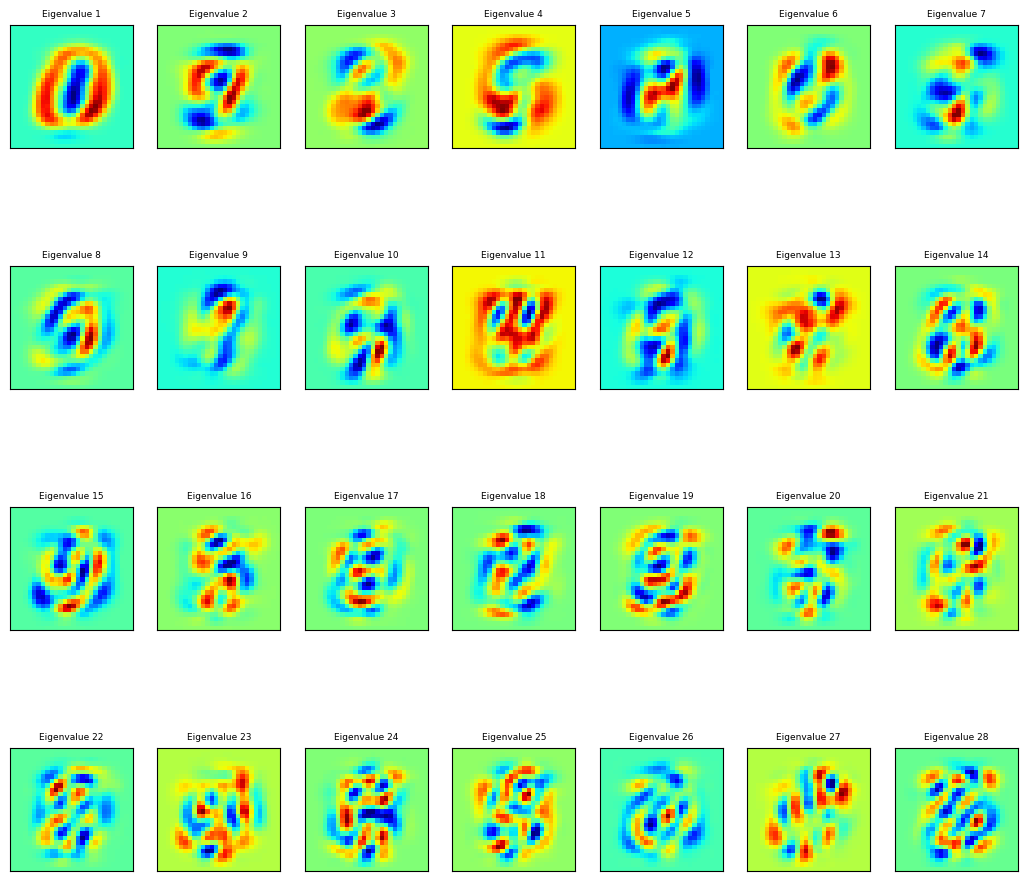

In [8]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

## Visualizing the MNIST Digit set on its own

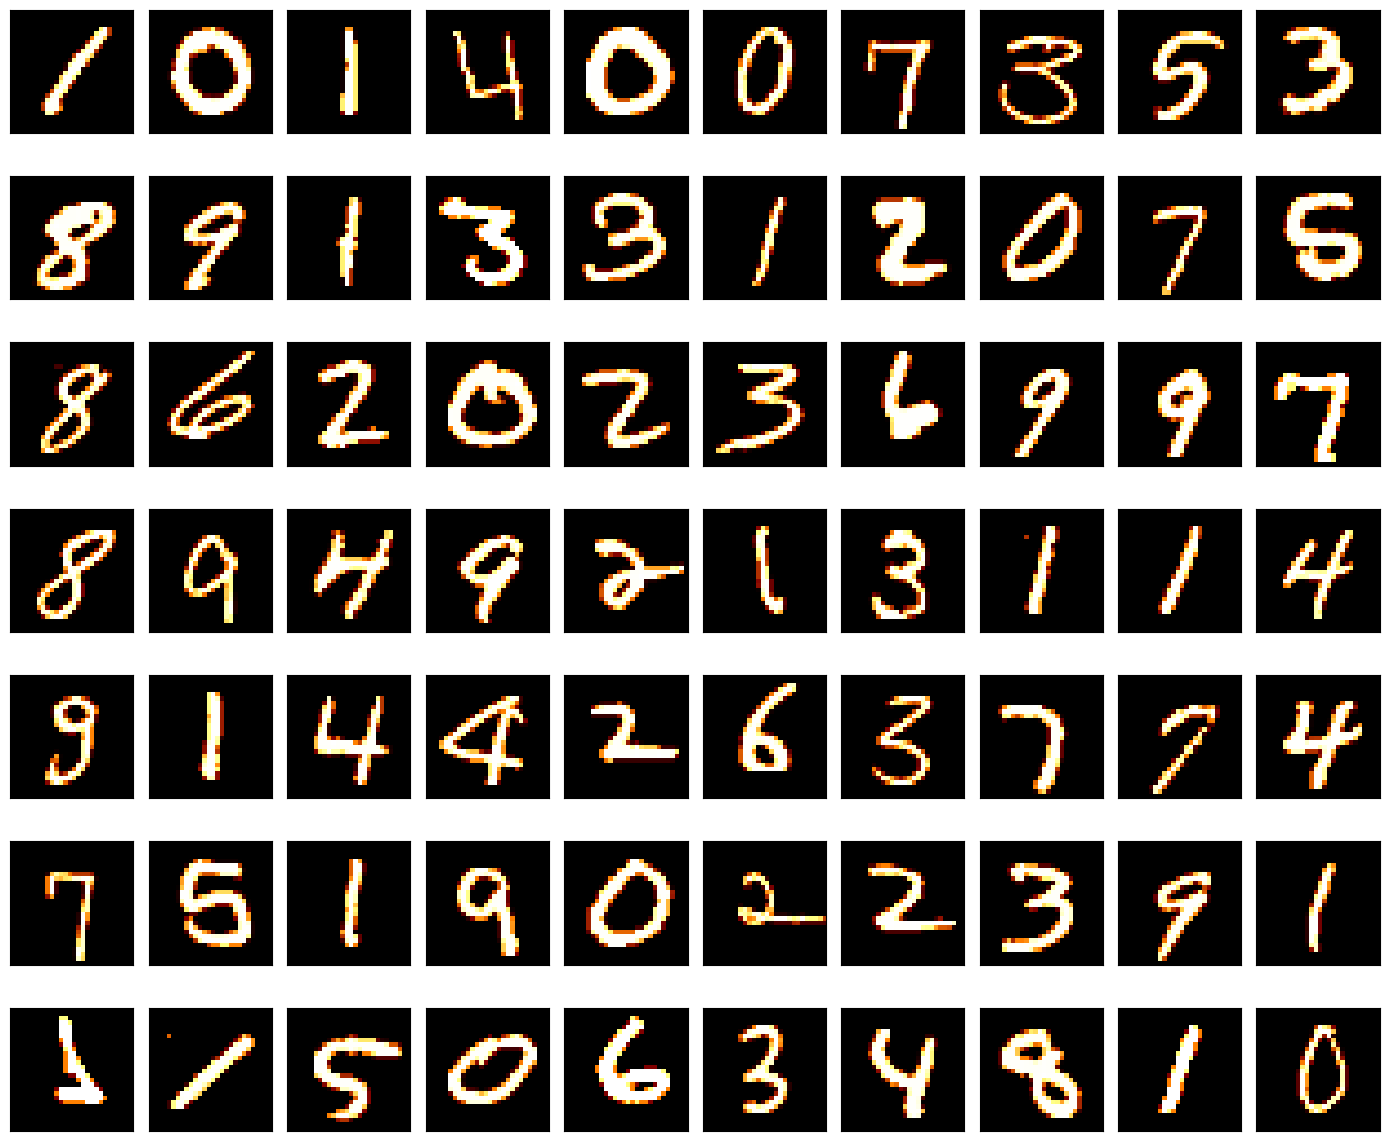

In [9]:
# plot some of the numbers
plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = train.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

## PCA Implementation

In [10]:
# Taking only the first N rows to speed things up
X = train[:6000].values

X_std = StandardScaler().fit_transform(X)

 
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)

Target = target[:6000]

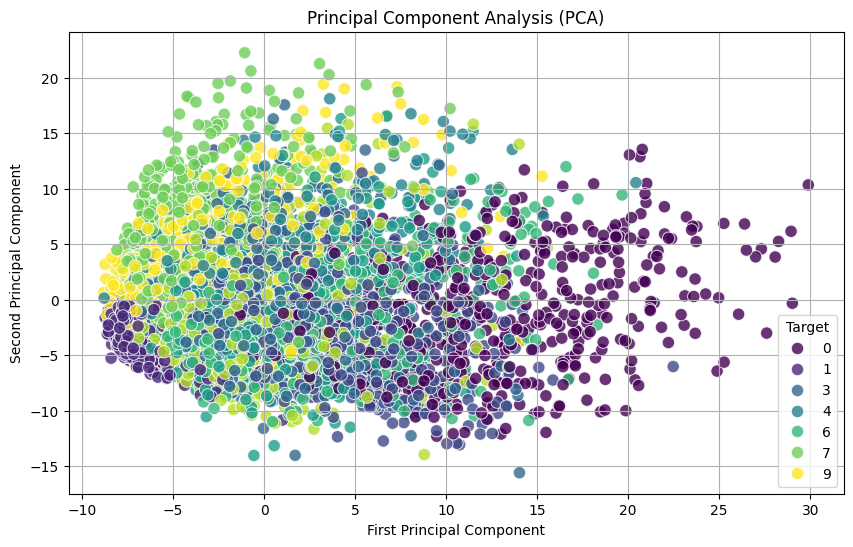

In [56]:
df = pd.DataFrame({'First Principal Component': X_5d[:, 0],
                   'Second Principal Component': X_5d[:, 1],
                   'Target': Target})

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='First Principal Component', 
    y='Second Principal Component', 
    hue='Target', 
    palette='viridis', 
    s=80, 
    alpha=0.8
)

plt.title('Principal Component Analysis (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.legend(title='Target', loc='best')
plt.grid(True)
plt.show()

## KMeans Clustering

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)
X_clustered = kmeans.fit_predict(X_5d)

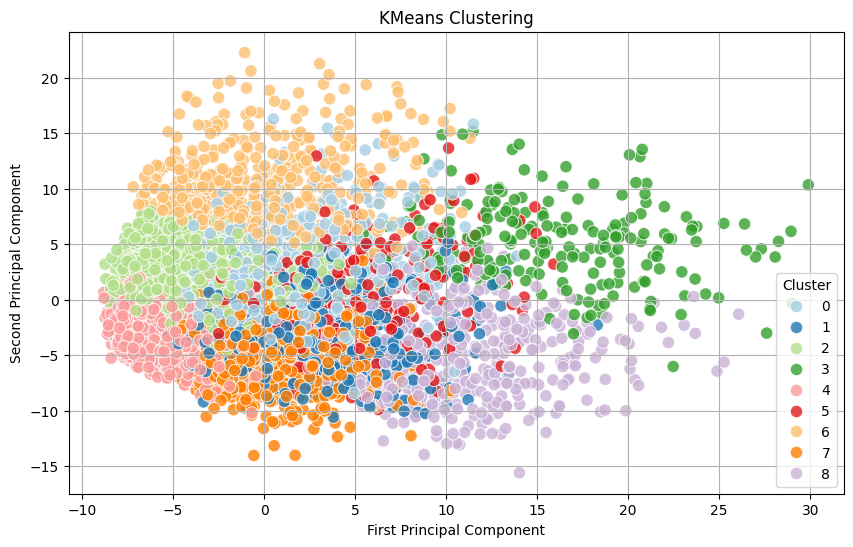

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_5d[:, 0], y=X_5d[:, 1], hue=X_clustered, palette='Paired', s=80, alpha=0.8)

# Set titles and labels
plt.title('KMeans Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

## LDA Implementation

In [59]:
lda = LDA(n_components=5)
X_LDA_2D = lda.fit_transform(X_std, Target.values )

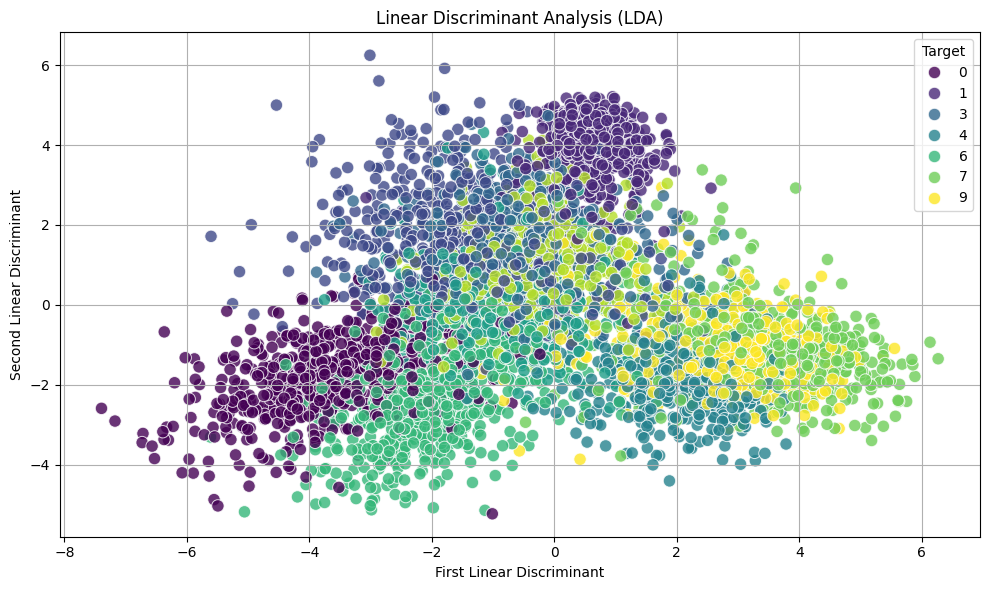

In [63]:
df = pd.DataFrame({
    'First Linear Discriminant': X_LDA_2D[:, 0],
    'Second Linear Discriminant': X_LDA_2D[:, 1],
    'Target': Target
})

# Plot with Seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='First Linear Discriminant',
    y='Second Linear Discriminant',
    hue='Target',
    palette='viridis', 
    s=80,  
    alpha=0.8  
)

# Set titles and labels
plt.title('Linear Discriminant Analysis (LDA)')
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')
plt.legend(title='Target', loc='best')

# Add grid and layout adjustments
plt.grid(True)
plt.tight_layout()  
plt.show()

## T-SNE Implementation

In [64]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_std) 

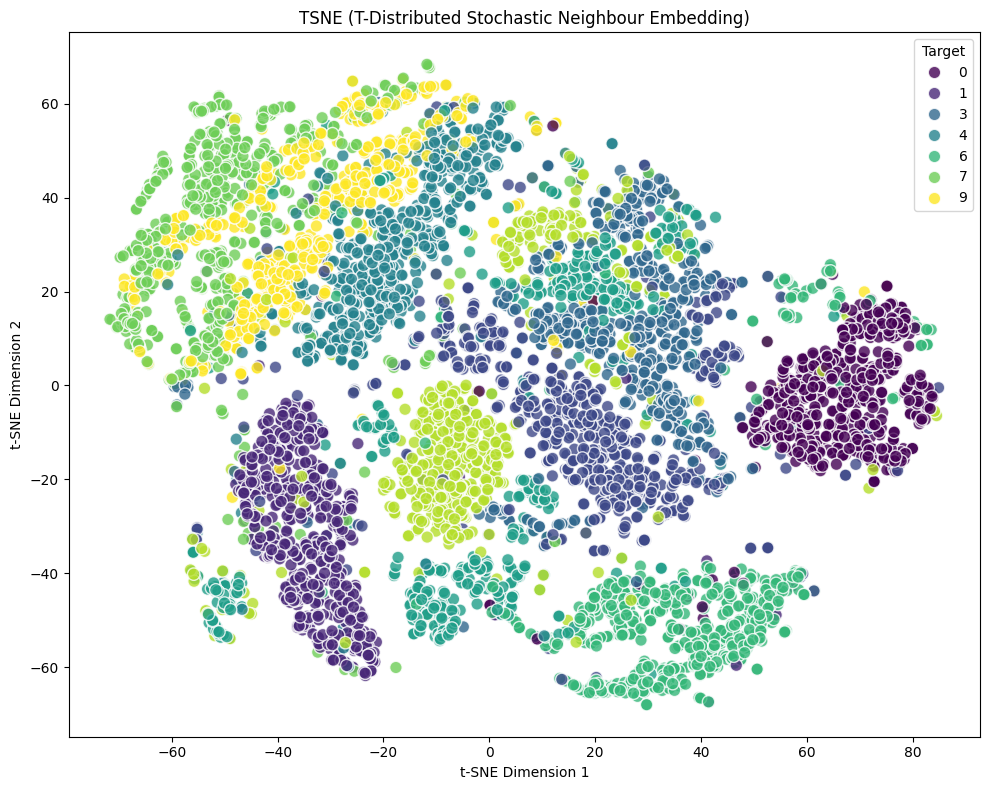

In [65]:
df = pd.DataFrame({
    't-SNE Dimension 1': tsne_results[:, 0],
    't-SNE Dimension 2': tsne_results[:, 1],
    'Target': Target
})

# Plot with Seaborn
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=df,
    x='t-SNE Dimension 1',
    y='t-SNE Dimension 2',
    hue='Target',
    palette='viridis', 
    s=80,  
    alpha=0.8,  
    edgecolor='white',  
    linewidth=1
)

# Set titles and labels
plt.title('TSNE (T-Distributed Stochastic Neighbour Embedding)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Target', loc='best')


plt.grid(False)
plt.tight_layout()  
plt.show()